In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
sys.path.append('/users/mtaranov/LongRange3D/')
from models_binnedFeat import LongRangeDNN
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
contacts='PP_PE'
path='/users/mtaranov/datasets_3d/dist_matched_'+contacts+'/'
X_train = get_features(path+'X_train_thres_10.npy')
y_train = get_labels(path+'y_train_thres_10.npy')
X_valid = get_features(path+'X_valid_thres_10.npy')
y_valid = get_labels(path+'y_valid_thres_10.npy')
X_test = get_features(path+'X_test_thres_10.npy')
y_test = get_labels(path+'y_test_thres_10.npy')

In [4]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


# without distance

In [4]:
scores_from_10_iter =[]
for i in range(10):
    dnn_normalized = LongRangeDNN(num_features=10, use_deep_CNN=True)
    validation_data = (X_valid_normalized[:, :, :10, :], y_valid)
    dnn_normalized.train(X_train_normalized[:, :, :10, :], y_train, validation_data)
    dnn_normalized.save(contacts+'dnn_CONV_wo_dist', '/users/mtaranov/LongRange3D/')
    print "Iter",i, " summary:"
    print(dnn_normalized.test(X_test_normalized[:, :, :10, :], y_test))
    print(dnn_normalized.test(X_train_normalized[:, :, :10, :], y_train))
    print(dnn_normalized.test(X_valid_normalized[:, :, :10, :], y_valid))
    
    weights='/users/mtaranov/LongRange3D/weights/'+contacts+'dnn_CONV_wo_dist.weights.h5'
    json_model='/users/mtaranov/LongRange3D/models/'+contacts+'dnn_CONV_wo_dist.arch.json'
    scores = dnn_normalized.deeplift(X_valid_normalized[:, :, :10, :], weights, json_model, batch_size=128)
    scores_from_10_iter.append(scores)

# pred_probs_test = dnn_normalized.predict(X_test_normalized[:, :, :10, :])
# #np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
# pred_probs_valid = dnn_normalized.predict(X_valid_normalized[:, :, :10, :])
# #np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
# pred_probs_train = dnn_normalized.predict(X_train_normalized[:, :, :10, :])
# #np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

/users/mtaranov/local/anaconda2/lib/python2.7/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


Training model...
Train on 6130 samples, validate on 3536 samples
Epoch 1/100
6000/6130 [============================>.] - ETA: 0s - loss: 1.4292Epoch 0: validation loss: 0.626
Balanced Accuracy: 66.43%	 auROC: 0.734	 auPRC: 0.730	 auPRG: 0.477
Recall at 5%|10%|20% FDR: 2.3%|3.8%|27.7%	 Num Positives: 1768	 Num Negatives: 1768	 

6130/6130 [==============================] - 12s - loss: 1.4246 - val_loss: 0.6264
Epoch 2/100
6000/6130 [============================>.] - ETA: 0s - loss: 0.9848Epoch 1: validation loss: 0.567
Balanced Accuracy: 70.93%	 auROC: 0.784	 auPRC: 0.770	 auPRG: 0.580
Recall at 5%|10%|20% FDR: 1.5%|4.9%|44.6%	 Num Positives: 1768	 Num Negatives: 1768	 

6130/6130 [==============================] - 12s - loss: 0.9872 - val_loss: 0.5672
Epoch 3/100
6000/6130 [============================>.] - ETA: 0s - loss: 0.8169Epoch 2: validation loss: 0.562
Balanced Accuracy: 72.57%	 auROC: 0.796	 auPRC: 0.776	 auPRG: 0.610
Recall at 5%|10%|20% FDR: 0.1%|0.1%|49.2%	 Num Positives:

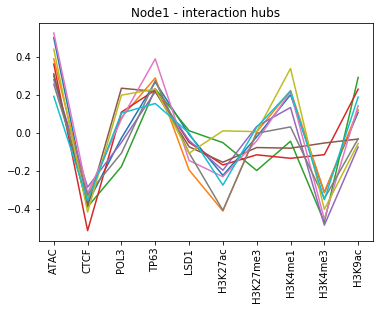

In [5]:
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac']
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 0], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node1 - interaction hubs')

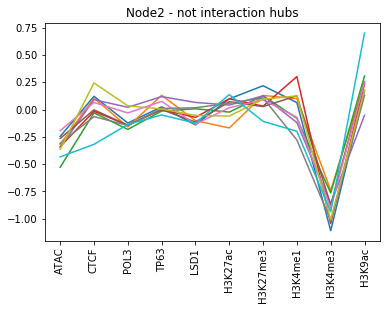

In [6]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 1], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node2 - not interaction hubs')

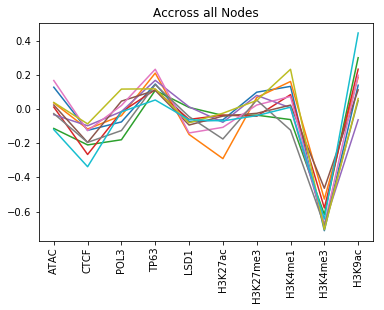

In [7]:
for i in range(10):
    # mean feature importance accross nodes
    plt.plot(np.mean(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=0), axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Accross all Nodes')

In [8]:
i=0
vmin = np.min(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=1))
vmax = np.max(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=1))
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac']
x = [float(i+0.5) for i in range(np.shape(scores)[2])]

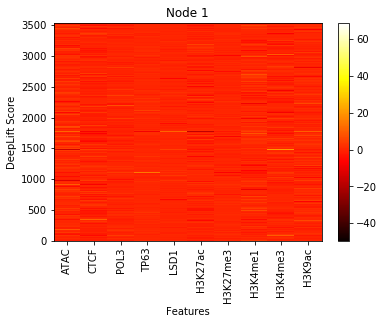

In [9]:
#plt.imshow(scores[:, 0, :, 0], cmap='hot', interpolation='nearest')
i=0
plt.pcolor(scores_from_10_iter[i][:, 0, :, 0], cmap='hot', vmin=vmin, vmax=vmax) # cmap='RdBu'
plt.xticks(x, features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('DeepLift Score')
plt.title('Node 1')
plt.colorbar()

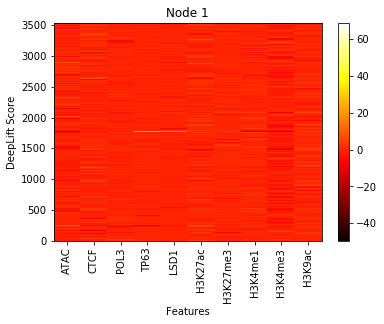

In [ ]:
#plt.imshow(scores[:, 0, :, 1], cmap='hot', interpolation='nearest')
i=0
plt.pcolor(scores_from_10_iter[i][:, 0, :, 1], cmap='hot', vmin=vmin, vmax=vmax) # cmap='RdBu'
plt.xticks(x, features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('DeepLift Score')
plt.title('Node 1')
plt.colorbar()

# with genomic locations

In [4]:
scores_from_10_iter =[]
for i in range(10):
    dnn_normalized = LongRangeDNN(num_features=11, use_deep_CNN=True)
    validation_data = (X_valid_normalized[:, :, :11, :], y_valid)
    dnn_normalized.train(X_train_normalized[:, :, :11, :], y_train, validation_data)
    dnn_normalized.save(contacts+'dnn_CONV_w_dist', '/users/mtaranov/LongRange3D/')
    print "Iter",i, " summary:"
    print(dnn_normalized.test(X_test_normalized[:, :, :11, :], y_test))
    print(dnn_normalized.test(X_train_normalized[:, :, :11, :], y_train))
    print(dnn_normalized.test(X_valid_normalized[:, :, :11, :], y_valid))
    
    weights='/users/mtaranov/LongRange3D/weights/'+contacts+'dnn_CONV_w_dist.weights.h5'
    json_model='/users/mtaranov/LongRange3D/models/'+contacts+'dnn_CONV_w_dist.arch.json'
    scores = dnn_normalized.deeplift(X_valid_normalized[:, :, :11, :], weights, json_model, batch_size=128)
    scores_from_10_iter.append(scores)

/users/mtaranov/local/anaconda2/lib/python2.7/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


Training model...
Train on 6130 samples, validate on 3536 samples
Epoch 1/100
6000/6130 [============================>.] - ETA: 0s - loss: 1.4222Epoch 0: validation loss: 0.600
Balanced Accuracy: 70.11%	 auROC: 0.763	 auPRC: 0.737	 auPRG: 0.548
Recall at 5%|10%|20% FDR: 0.2%|0.2%|19.9%	 Num Positives: 1768	 Num Negatives: 1768	 

6130/6130 [==============================] - 12s - loss: 1.4166 - val_loss: 0.6002
Epoch 2/100
6000/6130 [============================>.] - ETA: 0s - loss: 0.9817Epoch 1: validation loss: 0.568
Balanced Accuracy: 72.26%	 auROC: 0.786	 auPRC: 0.767	 auPRG: 0.598
Recall at 5%|10%|20% FDR: 0.0%|4.4%|45.1%	 Num Positives: 1768	 Num Negatives: 1768	 

6130/6130 [==============================] - 12s - loss: 0.9785 - val_loss: 0.5676
Epoch 3/100
6000/6130 [============================>.] - ETA: 0s - loss: 0.7967Epoch 2: validation loss: 0.564
Balanced Accuracy: 73.22%	 auROC: 0.793	 auPRC: 0.781	 auPRG: 0.613
Recall at 5%|10%|20% FDR: 2.3%|9.0%|51.6%	 Num Positives:

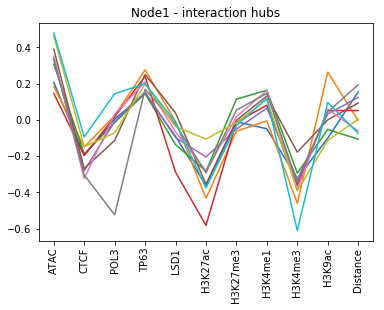

In [5]:
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'Distance']
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 0], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node1 - interaction hubs')

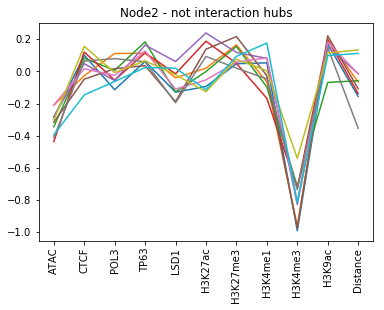

In [6]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 1], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node2 - not interaction hubs')

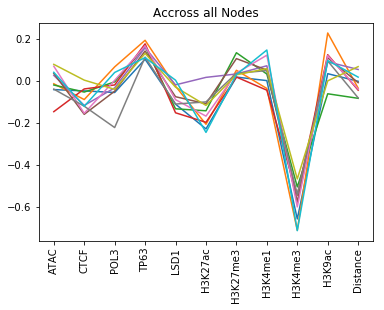

In [7]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=0), axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Accross all Nodes')

# with distance only

In [8]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)
validation_data = (X_valid_normalized[:, :, 10:, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, 10:, :], y_train, validation_data)

Training model...
Train on 6130 samples, validate on 3536 samples
Epoch 1/100
6000/6130 [============================>.] - ETA: 0s - loss: 1.4914Epoch 0: validation loss: 0.719
Balanced Accuracy: 47.85%	 auROC: 0.493	 auPRC: 0.496	 auPRG: 0.013
Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.1%	 Num Positives: 1768	 Num Negatives: 1768	 

6130/6130 [==============================] - 12s - loss: 1.4910 - val_loss: 0.7187
Epoch 2/100
6000/6130 [============================>.] - ETA: 0s - loss: 1.4319Epoch 1: validation loss: 0.754
Balanced Accuracy: 48.81%	 auROC: 0.481	 auPRC: 0.496	 auPRG: -0.051
Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.1%	 Num Positives: 1768	 Num Negatives: 1768	 

6130/6130 [==============================] - 12s - loss: 1.4321 - val_loss: 0.7542
Epoch 3/100
6000/6130 [============================>.] - ETA: 0s - loss: 1.4217Epoch 2: validation loss: 0.765
Balanced Accuracy: 51.56%	 auROC: 0.499	 auPRC: 0.481	 auPRG: 0.051
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 1

In [ ]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))
print(dnn_normalized.test(X_train_normalized[:, :,  10:, :], y_train))

Balanced Accuracy: 54.08%	 auROC: 0.570	 auPRC: 0.575	 auPRG: 0.115
Recall at 5%|10%|20% FDR: 0.2%|0.2%|1.1%	 Num Positives: 1189	 Num Negatives: 1189	 
Balanced Accuracy: 54.80%	 auROC: 0.574	 auPRC: 0.575	 auPRG: 0.129
Recall at 5%|10%|20% FDR: 0.4%|0.4%|4.3%	 Num Positives: 3065	 Num Negatives: 3065	 


## with ATAC only

In [5]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)
validation_data = (X_valid_normalized[:, :, :1, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :1, :], y_train, validation_data)

/users/mtaranov/local/anaconda2/lib/python2.7/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


Training model...
Train on 6130 samples, validate on 3536 samples
Epoch 1/100
6000/6130 [============================>.] - ETA: 0s - loss: 1.4842Epoch 0: validation loss: 0.703
Balanced Accuracy: 54.98%	 auROC: 0.599	 auPRC: 0.607	 auPRG: 0.177
Recall at 5%|10%|20% FDR: 1.2%|1.2%|6.2%	 Num Positives: 1768	 Num Negatives: 1768	 

6130/6130 [==============================] - 12s - loss: 1.4815 - val_loss: 0.7027
Epoch 2/100
6000/6130 [============================>.] - ETA: 0s - loss: 1.3738Epoch 1: validation loss: 0.696
Balanced Accuracy: 56.84%	 auROC: 0.617	 auPRC: 0.604	 auPRG: 0.230
Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.1%	 Num Positives: 1768	 Num Negatives: 1768	 

6130/6130 [==============================] - 19s - loss: 1.3729 - val_loss: 0.6957
Epoch 3/100
6000/6130 [============================>.] - ETA: 0s - loss: 1.3818Epoch 2: validation loss: 0.705
Balanced Accuracy: 58.46%	 auROC: 0.612	 auPRC: 0.603	 auPRG: 0.212
Recall at 5%|10%|20% FDR: 0.2%|0.2%|3.3%	 Num Positives: 17

In [6]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))
print(dnn_normalized.test(X_train_normalized[:, :,  10:, :], y_train))

Balanced Accuracy: 50.13%	 auROC: 0.493	 auPRC: 0.491	 auPRG: 0.004
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 1189	 Num Negatives: 1189	 
Balanced Accuracy: 51.16%	 auROC: 0.507	 auPRC: 0.500	 auPRG: 0.031
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 3065	 Num Negatives: 3065	 


# Print prediction

In [ ]:
indx_train = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_train_thres_10.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_valid_thres_10.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_test_thres_10.npy')

In [ ]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

In [ ]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

In [ ]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

In [ ]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )